   ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
0   1                    4        -0.700755                  177   
1   2                    4         1.421578                  216   
2   3                    2        -0.700755                  183   
3   4                    3         0.006689                  176   
4   5                    2        -0.700755                  184   

   Prior_purchases  Gender  Discount_offered  Weight_in_gms  \
0                3       0          1.889983           1233   
1                2       1          2.815636           3088   
2                4       1          2.136824           3374   
3                4       1         -0.208162           1177   
4                3       0          2.013404           2484   

   Warehouse_block_A  Warehouse_block_B  Warehouse_block_C  Warehouse_block_D  \
0              False              False              False               True   
1              False              False           

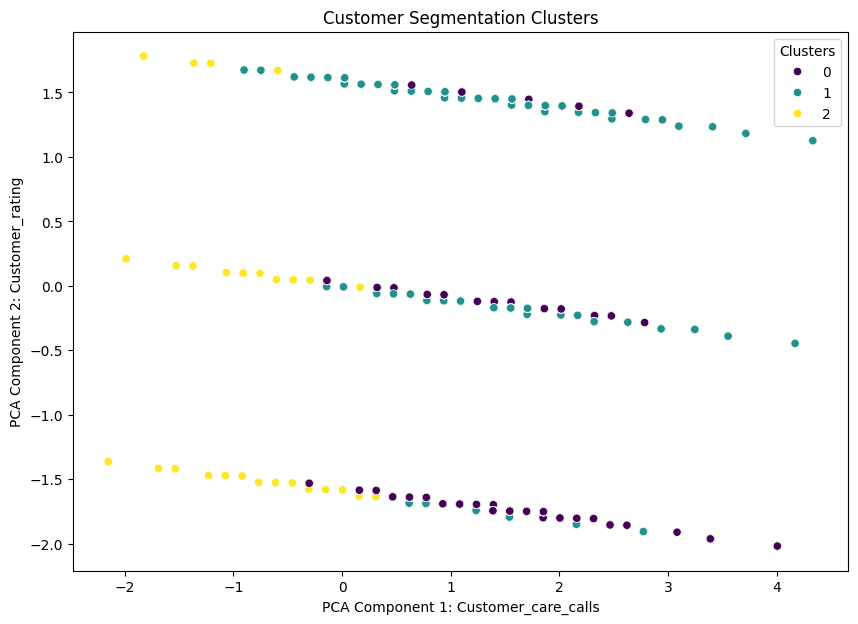

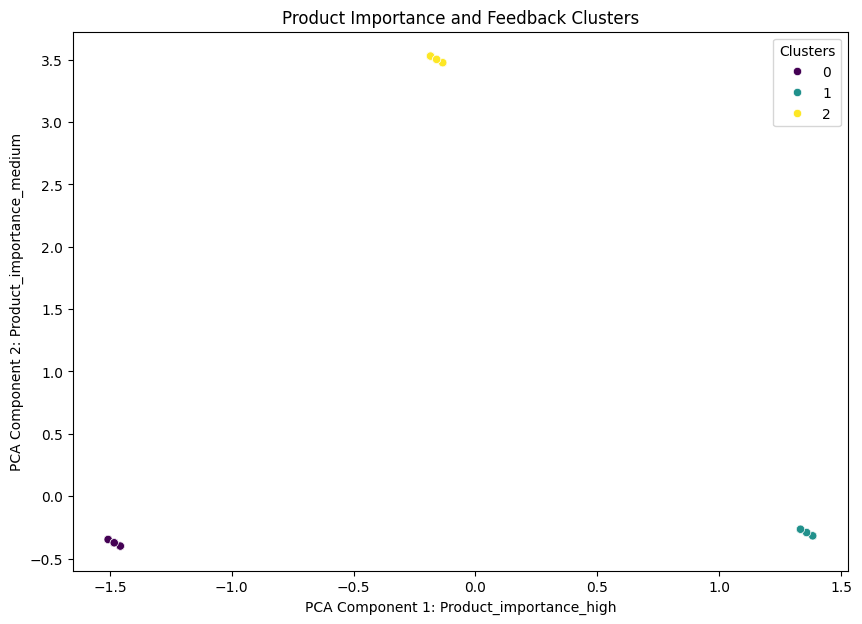

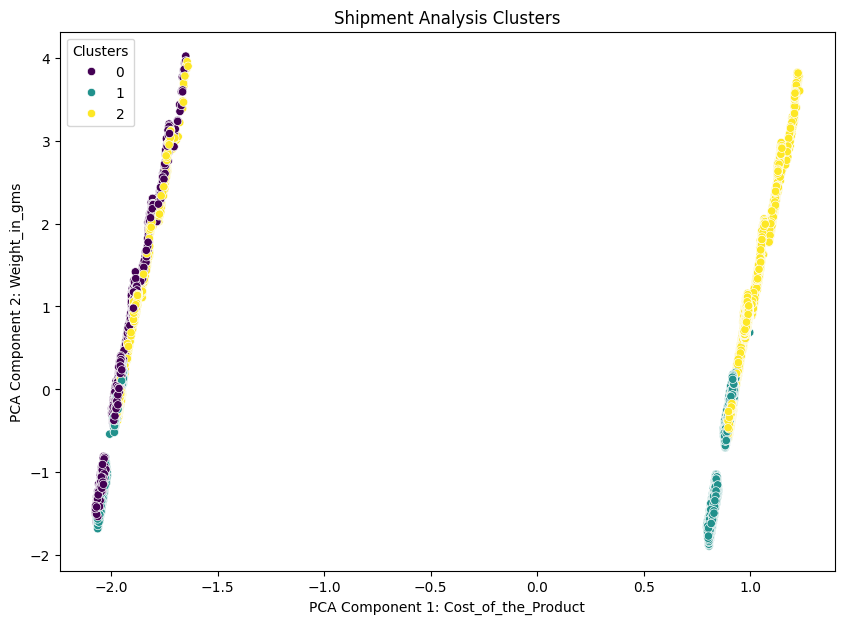

In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'processed_data.csv'  # Update the path to your CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Drop the 'ID' column as it is not needed for clustering
data.drop(columns=['ID'], inplace=True)

# Convert categorical boolean columns to integers
data = data.astype(int)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create a DataFrame for scaled data
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

# Function to plot clusters
def plot_clusters(data, labels, feature_names, title):
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels, palette='viridis')
    plt.title(title)
    plt.xlabel(f'PCA Component 1: {feature_names[0]}')
    plt.ylabel(f'PCA Component 2: {feature_names[1]}')
    plt.legend(title='Clusters')
    plt.show()

# 1. Clustering for customer segmentation
customer_features = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases']
customer_data = data_scaled_df[customer_features]

kmeans_customers = KMeans(n_clusters=3, random_state=42)
customer_labels = kmeans_customers.fit_predict(customer_data)

plot_clusters(customer_data, customer_labels, customer_features, 'Customer Segmentation Clusters')

# 2. Clustering for product importance and customer feedback
product_features = [ 'Product_importance_high', 'Product_importance_medium', 'Product_importance_low', 'Customer_rating']
product_data = data_scaled_df[product_features]

kmeans_products = KMeans(n_clusters=3, random_state=42)
product_labels = kmeans_products.fit_predict(product_data)

plot_clusters(product_data, product_labels, product_features, 'Product Importance and Feedback Clusters')

# 3. Clustering for shipment analysis
shipment_features = ['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered', 'Mode_of_Shipment_Flight', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship', 'Reached.on.Time_Y.N']
shipment_data = data_scaled_df[shipment_features]

kmeans_shipments = KMeans(n_clusters=3, random_state=42)
shipment_labels = kmeans_shipments.fit_predict(shipment_data)

plot_clusters(shipment_data, shipment_labels, shipment_features, 'Shipment Analysis Clusters')


   ID Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1           Flight                    4                2   
1   2           Flight                    4                5   
2   3           Flight                    2                2   
3   4           Flight                    3                3   
4   5           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48       

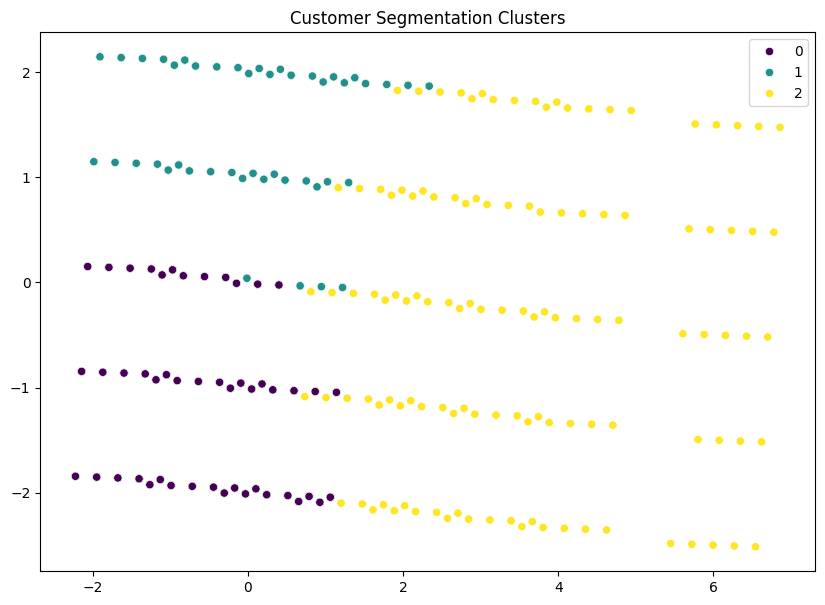

ValueError: could not convert string to float: 'low'

In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'ecommerce_dataset.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data = data.drop('Warehouse_block', axis=1)
# Display the first few rows of the dataset
print(data.head())

# Drop the 'ID' column as it is not needed for clustering
data.drop(columns=['ID'], inplace=True)





# Create a DataFrame for scaled data
data_scaled_df = data

# Function to plot clusters
def plot_clusters(data, labels, title):
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels, palette='viridis')
    plt.title(title)
    plt.show()

# 1. Clustering for customer segmentation
customer_features = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases']
customer_data = data_scaled_df[customer_features]

kmeans_customers = KMeans(n_clusters=3, random_state=42)
customer_labels = kmeans_customers.fit_predict(customer_data)

plot_clusters(customer_data, customer_labels, 'Customer Segmentation Clusters')

# 2. Clustering for product importance and customer feedback
product_features = ['Cost_of_the_Product', 'Product_importance', 'Customer_rating']
product_data = data_scaled_df[product_features]

kmeans_products = KMeans(n_clusters=3, random_state=42)
product_labels = kmeans_products.fit_predict(product_data)

plot_clusters(product_data, product_labels, 'Product Importance and Feedback Clusters')

# 3. Clustering for shipment analysis
shipment_features = ['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered','Mode_of_Shipment' , 'Reached.on.Time_Y.N']
shipment_data = data_scaled_df[shipment_features]

kmeans_shipments = KMeans(n_clusters=3, random_state=42)
shipment_labels = kmeans_shipments.fit_predict(shipment_data)

plot_clusters(shipment_data, shipment_labels, 'Shipment Analysis Clusters')


In [27]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Load the dataset
file_path = 'processed_data.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Drop the 'ID' column as it is not needed for clustering
data.drop(columns=['ID'], inplace=True)

# Convert categorical columns to dummy variables
data = pd.get_dummies(data, columns=['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], drop_first=True)

# Function to plot clusters
def plot_clusters(data, labels, title, feature_names):
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels, palette='viridis')
    plt.title(title)
    plt.xlabel(f'PCA Component 1: {feature_names[0]}')
    plt.ylabel(f'PCA Component 2: {feature_names[1]}')
    plt.legend(title='Clusters')
    plt.show()

# 1. Clustering for customer segmentation
customer_features = ['Customer_care_calls', 'Customer_rating', 'Prior_purchases']
customer_data = data[customer_features]

kmeans_customers = KMeans(n_clusters=3, random_state=42)
customer_labels = kmeans_customers.fit_predict(customer_data)

plot_clusters(customer_data, customer_labels, 'Customer Segmentation Clusters', customer_features)

# 2. Clustering for product importance and customer feedback
product_features = ['Cost_of_the_Product', 'Product_importance_low', 'Product_importance_medium', 'Customer_rating']
product_data = data[product_features]

kmeans_products = KMeans(n_clusters=3, random_state=42)
product_labels = kmeans_products.fit_predict(product_data)

plot_clusters(product_data, product_labels, 'Product Importance and Feedback Clusters', product_features[:2])

# 3. Clustering for shipment analysis
shipment_features = ['Cost_of_the_Product', 'Weight_in_gms', 'Discount_offered', 'Mode_of_Shipment_Road', 'Mode_of_Shipment_Ship', 'Reached.on.Time_Y.N']
shipment_data = data[shipment_features]

kmeans_shipments = KMeans(n_clusters=3, random_state=42)
shipment_labels = kmeans_shipments.fit_predict(shipment_data)

plot_clusters(shipment_data, shipment_labels, 'Shipment Analysis Clusters', shipment_features[:2])


   ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
0   1                    4        -0.700755                  177   
1   2                    4         1.421578                  216   
2   3                    2        -0.700755                  183   
3   4                    3         0.006689                  176   
4   5                    2        -0.700755                  184   

   Prior_purchases  Gender  Discount_offered  Weight_in_gms  \
0                3       0          1.889983           1233   
1                2       1          2.815636           3088   
2                4       1          2.136824           3374   
3                4       1         -0.208162           1177   
4                3       0          2.013404           2484   

   Warehouse_block_A  Warehouse_block_B  Warehouse_block_C  Warehouse_block_D  \
0              False              False              False               True   
1              False              False           

KeyError: "['Warehouse_block', 'Mode_of_Shipment', 'Product_importance'] not in index"

   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233            

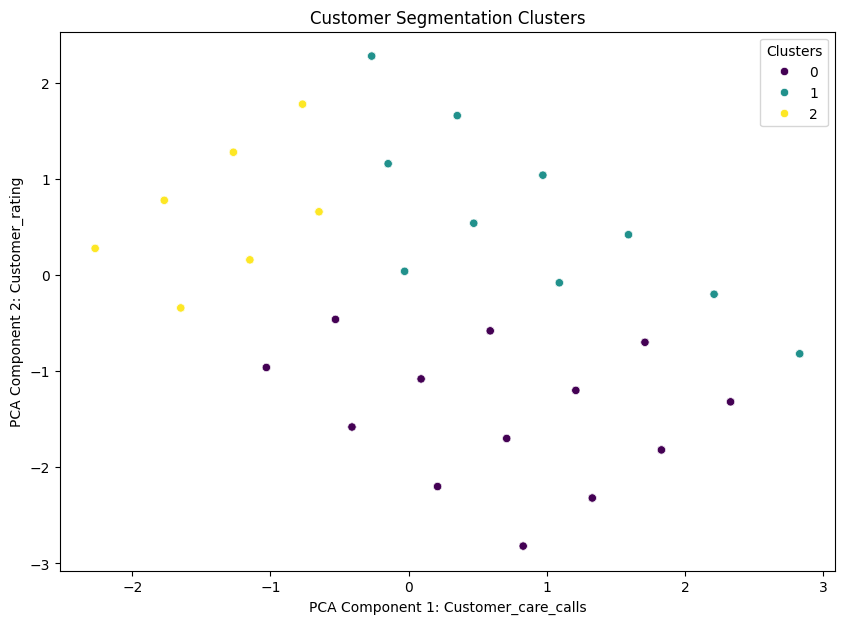

Customer Segmentation Clusters:
Silhouette Score: 0.38028768148031183
Calinski-Harabasz Index: 7164.304026508096
Davies-Bouldin Index: 0.9020698095056442



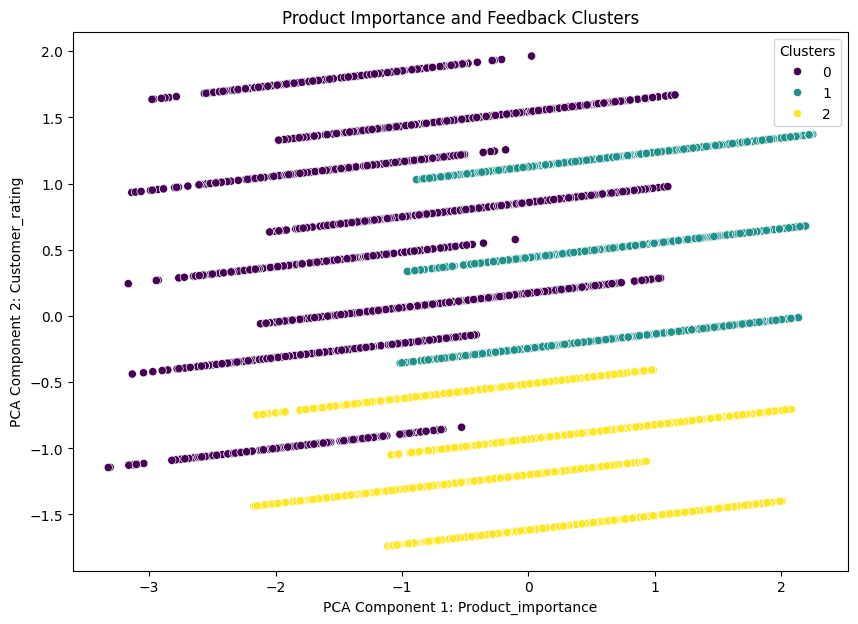

Product Importance and Feedback Clusters:
Silhouette Score: 0.27678627508854203
Calinski-Harabasz Index: 4071.042389211053
Davies-Bouldin Index: 1.2727395480526262



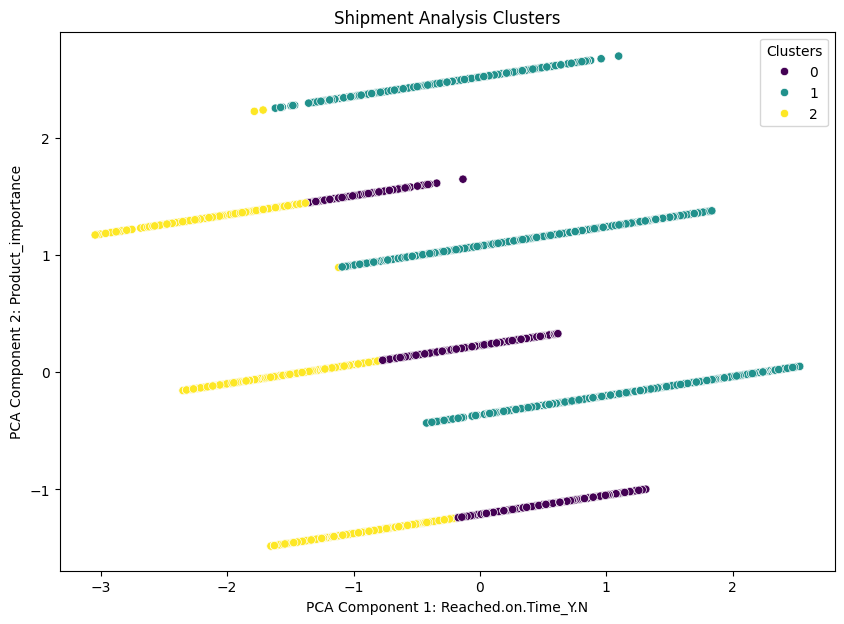

Shipment Analysis Clusters:
Silhouette Score: 0.34907289495738375
Calinski-Harabasz Index: 5164.076522832578
Davies-Bouldin Index: 1.166699581474307



In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load the dataset
file_path = 'ecommerce_dataset.csv'  # Update the path to your CSV file
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Drop the 'ID' column as it is not needed for clustering
data.drop(columns=['ID'], inplace=True)

# Convert categorical columns to numerical values
data['Product_importance'] = data['Product_importance'].map({'low': 0, 'medium': 1, 'high': 2})
data = pd.get_dummies(data, columns=['Warehouse_block', 'Mode_of_Shipment', 'Gender'], drop_first=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Create a DataFrame for scaled data
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

# Function to plot clusters
def plot_clusters(data, labels, feature_names, title):
    pca = PCA(n_components=2)
    data_pca = pca.fit_transform(data)
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=labels, palette='viridis')
    plt.title(title)
    plt.xlabel(f'PCA Component 1: {feature_names[0]}')
    plt.ylabel(f'PCA Component 2: {feature_names[1]}')
    plt.legend(title='Clusters')
    plt.show()

# Function to evaluate clusters
def evaluate_clusters(data, labels):
    silhouette_avg = silhouette_score(data, labels)
    ch_score = calinski_harabasz_score(data, labels)
    db_score = davies_bouldin_score(data, labels)
    return silhouette_avg, ch_score, db_score

# 1. Clustering for customer segmentation
customer_features = ['Customer_care_calls', 'Customer_rating']
customer_data = data_scaled_df[customer_features]

kmeans_customers = KMeans(n_clusters=3, random_state=42)
customer_labels = kmeans_customers.fit_predict(customer_data)

plot_clusters(customer_data, customer_labels, customer_features, 'Customer Segmentation Clusters')
silhouette_avg, ch_score, db_score = evaluate_clusters(customer_data, customer_labels)
print(f'Customer Segmentation Clusters:\nSilhouette Score: {silhouette_avg}\nCalinski-Harabasz Index: {ch_score}\nDavies-Bouldin Index: {db_score}\n')

# 2. Clustering for product importance and customer feedback
product_features = ['Product_importance', 'Customer_rating','Cost_of_the_Product']
product_data = data_scaled_df[product_features]

kmeans_products = KMeans(n_clusters=3, random_state=42)
product_labels = kmeans_products.fit_predict(product_data)

plot_clusters(product_data, product_labels, product_features, 'Product Importance and Feedback Clusters')
silhouette_avg, ch_score, db_score = evaluate_clusters(product_data, product_labels)
print(f'Product Importance and Feedback Clusters:\nSilhouette Score: {silhouette_avg}\nCalinski-Harabasz Index: {ch_score}\nDavies-Bouldin Index: {db_score}\n')

# 3. Clustering for shipment analysis
shipment_features = ['Reached.on.Time_Y.N','Product_importance','Cost_of_the_Product']
shipment_data = data_scaled_df[shipment_features]
shipment_data.head(100)

kmeans_shipments = KMeans(n_clusters=3, random_state=42)
shipment_labels = kmeans_shipments.fit_predict(shipment_data)

plot_clusters(shipment_data, shipment_labels, shipment_features, 'Shipment Analysis Clusters')
silhouette_avg, ch_score, db_score = evaluate_clusters(shipment_data, shipment_labels)
print(f'Shipment Analysis Clusters:\nSilhouette Score: {silhouette_avg}\nCalinski-Harabasz Index: {ch_score}\nDavies-Bouldin Index: {db_score}\n')


In [42]:
shipment_data.head(10000)

,Reached.on.Time_Y.N,Cost_of_the_Product
0,0.822138,-0.690722
1,0.822138,0.120746
2,0.822138,-0.565881
3,0.822138,-0.711529
4,0.822138,-0.545074
...,...,...
9995,-1.216341,1.285929
9996,-1.216341,1.140281
9997,0.822138,-0.628301
9998,-1.216341,-0.482653


In [49]:
data.head(100)

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_M
0,4,2,177,3,0,44,1233,1,False,False,True,False,False,False,False
1,4,5,216,2,0,59,3088,1,False,False,False,True,False,False,True
2,2,2,183,4,0,48,3374,1,False,False,False,False,False,False,True
3,3,3,176,4,1,10,1177,1,True,False,False,False,False,False,True
4,2,2,184,3,1,46,2484,1,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,3,235,3,0,57,2034,1,False,False,False,True,False,True,True
96,3,3,149,2,1,18,1225,1,False,False,True,False,False,True,True
97,4,1,271,2,1,8,2401,1,False,False,False,True,False,True,False
98,3,5,144,4,1,5,1104,1,False,False,False,False,False,True,True
